<a href="https://colab.research.google.com/github/aunraza19/ANN-Lab-Tasks/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

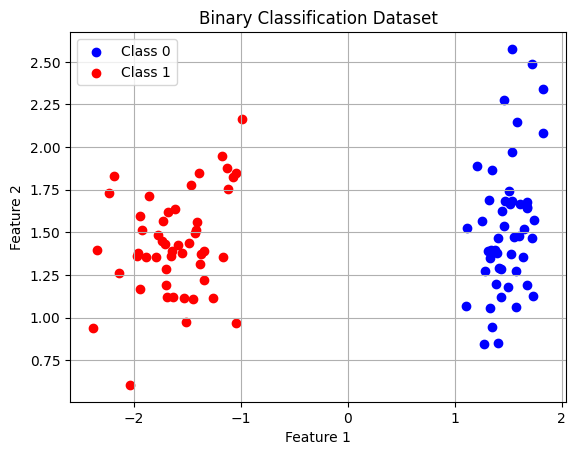

In [ ]:
# Task 1: Generate a Binary Classification Dataset:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, random_state=1)

# Plot dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


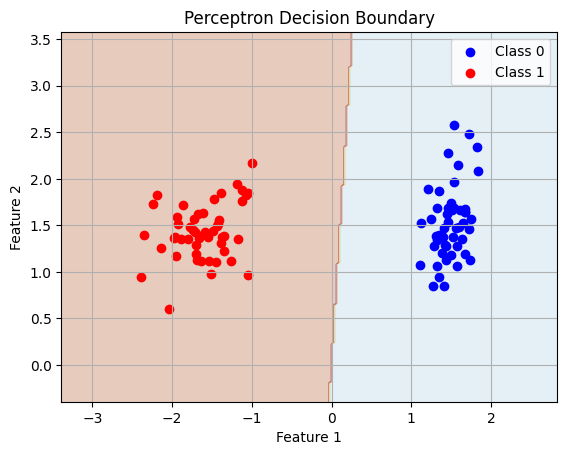

In [ ]:
# Task 2: Perceptron Algorithm with Decision Boundary:class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.lr = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.errors = []
        self.weights = np.zeros(X.shape[1] + 1)

        for _ in range(self.n_epochs):
            error_count = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error_count += int(update != 0.0)
            self.errors.append(error_count)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Train perceptron
perceptron = Perceptron(learning_rate=0.01, n_epochs=10)
perceptron.fit(X, y)

# Plot decision boundary
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_boundary(perceptron, X, y, "Perceptron Decision Boundary")


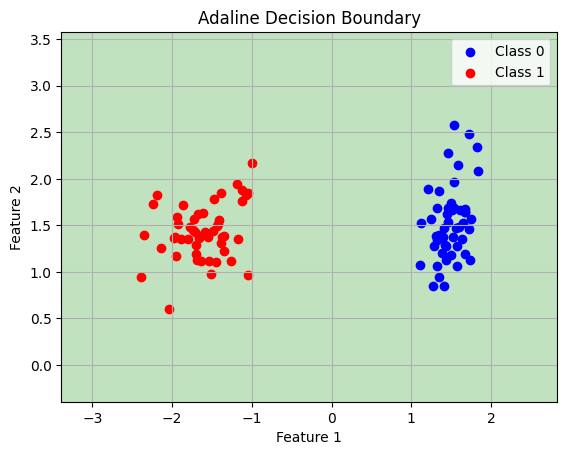

In [ ]:
# Task 3: Implement Adaline Algorithm and Train:class Adaline:
    def __init__(self, learning_rate=0.01, n_epochs=50):
        self.lr = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.losses = []

        for _ in range(self.n_epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            self.weights[1:] += self.lr * X.T.dot(errors)
            self.weights[0] += self.lr * errors.sum()
            loss = (errors ** 2).mean() / 2.0
            self.losses.append(loss)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, 0)

# Train Adaline
adaline = Adaline(learning_rate=0.01, n_epochs=20)
adaline.fit(X, y)
plot_boundary(adaline, X, y, "Adaline Decision Boundary")


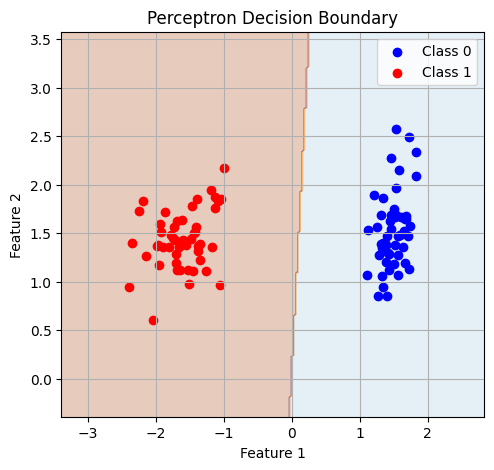

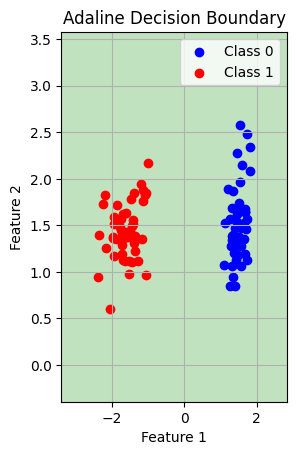

In [ ]:
# Task 4: Compare Decision Boundaries and Convergence:
# Plot both decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_boundary(perceptron, X, y, "Perceptron Decision Boundary")

plt.subplot(1, 2, 2)
plot_boundary(adaline, X, y, "Adaline Decision Boundary")


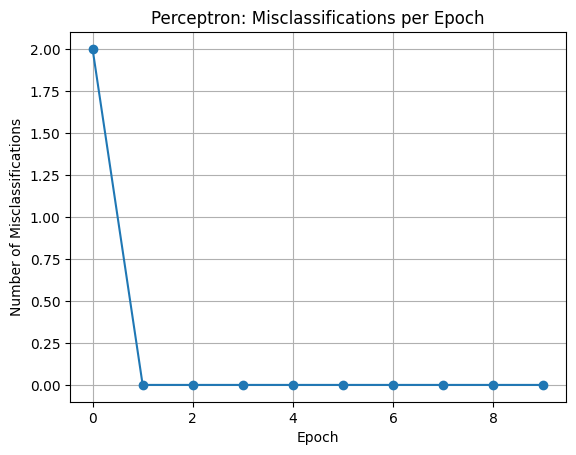

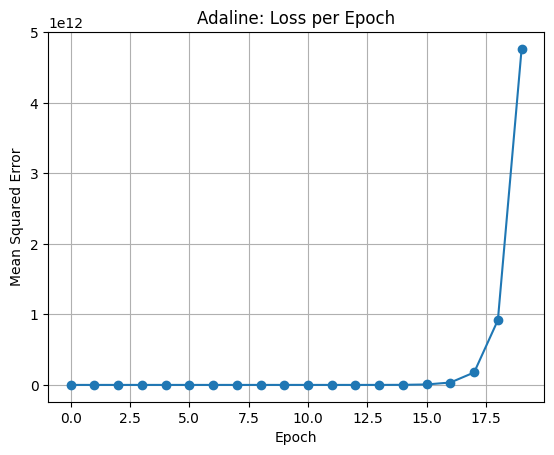

In [ ]:
# Perceptron errors per epoch
plt.plot(perceptron.errors, marker='o')
plt.title("Perceptron: Misclassifications per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Number of Misclassifications")
plt.grid(True)
plt.show()

# Adaline loss per epoch
plt.plot(adaline.losses, marker='o')
plt.title("Adaline: Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()
